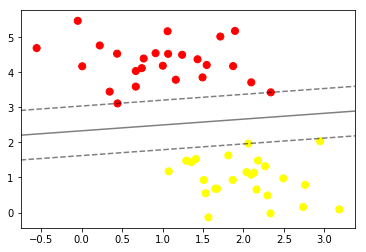

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
#导入数据集
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6) #n_samples=50意思取50个点，centers=2意思是将数据分为两
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
#绘制决策边界
# xfit = np.linspace(-1, 3.5)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plt.plot(xfit, xfit+0.65, '-k')
# plt.plot(xfit, 0.5*xfit+1.6, '-k')
# plt.plot(xfit, -0.2*xfit+2.9, '-k')
# plt.xlim(-1, 3.5)

#构造支持向量机
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.stack((X.flat, Y.flat),axis=1)
    P = model.decision_function(xy).reshape(X.shape)
# 绘制决策边界
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
            ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);